In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df_sonar=pd.read_csv(r'D:\ML\8 sonar_dateset_machine_learning\sonar.csv',header=None)
df_sonar.head(2)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R


In [5]:
df_sonar.shape

(208, 61)

In [6]:
df_sonar.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<AxesSubplot:>

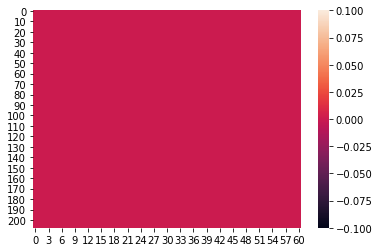

In [7]:
sns.heatmap(df_sonar.isnull())

In [9]:
df_sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

<AxesSubplot:xlabel='60', ylabel='count'>

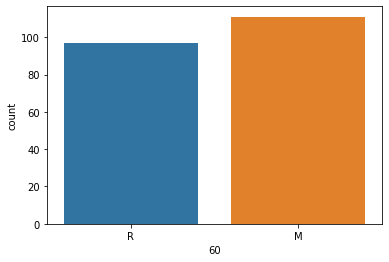

In [12]:
sns.countplot(x=60,data=df_sonar)

In [31]:
df_x=df_sonar.iloc[:,:59]
df_y=df_sonar.iloc[:,-1:]

In [32]:
df_y

,60
0,R
1,R
2,R
3,R
4,R
...,...
203,M
204,M
205,M
206,M


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(df_y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
def maxf1_score(clf,df_x,y):
    maxf=0
    rs=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred=clf.predict(x_test)
        tmp=f1_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        if tmp>maxf:
            maxf=tmp
            rs=r_state
    print("maximum f1_score is at random state :",rs," and it is :",maxf)

In [43]:
#lets use logistic regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
maxf1_score(log_reg,df_x,y)

maximum f1_score is at random state : 82  and it is : 0.9


In [44]:
#Lets use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier()
maxf1_score(dc,df_x,y)


maximum f1_score is at random state : 95  and it is : 0.8780487804878048


In [45]:
#Lets use KNN
#For KNN we need to know the best value of k using grid search
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(kc, neighbors, cv=5,scoring="f1")
clf.fit(df_x,y)
clf.best_params_

{'n_neighbors': 3}

In [46]:
#KNN classifier with n_neighbors=3
kc=KNeighborsClassifier(n_neighbors=3)
maxf1_score(kc,df_x,y)

maximum f1_score is at random state : 66  and it is : 0.9230769230769231


In [47]:
#Lets use SVM classifier
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(df_x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [48]:
svc=SVC(kernel="linear",C=10)
maxf1_score(svc,df_x,y)

maximum f1_score is at random state : 91  and it is : 0.8717948717948718


In [49]:
#From above table w.r.t F1_score SVM is performing the best 
#So we will choose that model
#max score is achived at random state 91
x_train,x_test,y_train,y_test=train_test_split(df_x, y,random_state = 91,test_size=0.20,stratify=y)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [50]:
#Model performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20  2]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.89      0.85      0.87        20

    accuracy                           0.88        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.88      0.88      0.88        42



In [52]:
import pickle
pickle.dump(svc,open('sonar_datset_svm.pkl','wb'))